# IMDB dataset importing

In [1]:
# Libraries importing
from keras.datasets import imdb
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 4000)
# num_words = dictionnary len

In [3]:
for i in range(5) :
    print(len(x_train[i]))

218
189
141
550
147


In [4]:
# 0 = pad token
# 1 = beginning character of the review
# 2 = words that aren't in the dictionnary : "oov_char" parameter

# Review 123 decoding

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, '') for i in x_train[123]])
decoded_review

' beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to  on and rate it so other would enjoy too'

# Dataset processing

In [6]:
# Definition of the review structure in 200 characters
x_train_padded = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen = 200)
x_test_padded = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen = 200)

In [7]:
x_train_padded.shape, x_test_padded.shape

((25000, 200), (25000, 200))

In [8]:
x_train_padded[0][0]

5

In [9]:
# Defining validation and test data
x_data_val, y_data_val = x_test_padded[:int(len(x_test_padded)/2)], y_test[:int(len(x_test_padded)/2)]
x_data_test, y_data_test = x_test_padded[int(len(x_test_padded)/2):], y_test[int(len(x_test_padded)/2):]

In [10]:
x_data_val.shape, x_data_test.shape

((12500, 200), (12500, 200))

# Definition of the model

In [12]:
# Libraries importing
from keras.layers import Input, Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D
from keras.models import Model
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

In [20]:
input_layer = Input(shape = [200,], dtype = 'int64')

embedding_layer = Embedding(input_dim = 4000, input_length = 200, output_dim = 64)(input_layer)

conv_layer = Conv1D(16, 3, input_shape = (200, 64))(embedding_layer)

dropout_layer = Dropout(0.5)(conv_layer)

pooling_layer = MaxPooling1D(2)(dropout_layer)

flatten_layer = Flatten()(pooling_layer)

output_layer = Dense(1, activation = "sigmoid")(flatten_layer)

model = Model(inputs = input_layer, outputs = output_layer)

model.compile(optimizer = Adam(), loss = BinaryCrossentropy(), metrics = [BinaryAccuracy()])

# Model fitting
history = model.fit(x_train_padded, y_train, batch_size = 32, epochs = 5, validation_data = (x_data_val, y_data_val))

Epoch 1/5


c:\Users\natha\Documents\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\natha\Documents\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.6554 - loss: 0.5734 - val_binary_accuracy: 0.8592 - val_loss: 0.3233
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.8919 - loss: 0.2628 - val_binary_accuracy: 0.8674 - val_loss: 0.3098
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.9120 - loss: 0.2151 - val_binary_accuracy: 0.8642 - val_loss: 0.3144
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.9357 - loss: 0.1695 - val_binary_accuracy: 0.8426 - val_loss: 0.3881
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.9478 - loss: 0.1417 - val_binary_accuracy: 0.8583 - val_loss: 0.3646


In [21]:
plot_model(model, to_file = "IMDB_ConvNet_model.png", show_shapes = True);

# Displaying the training results

In [22]:
# Libraries importing
import pandas as pd

In [23]:
df_curve = pd.DataFrame(history.history)
df_curve_loss = df_curve[["loss", "val_loss"]]
df_curve_acc = df_curve[["binary_accuracy", "val_binary_accuracy"]]

<Axes: >

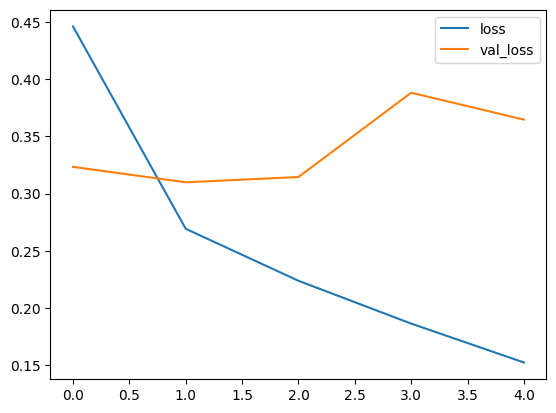

In [24]:
df_curve_loss.plot()

<Axes: >

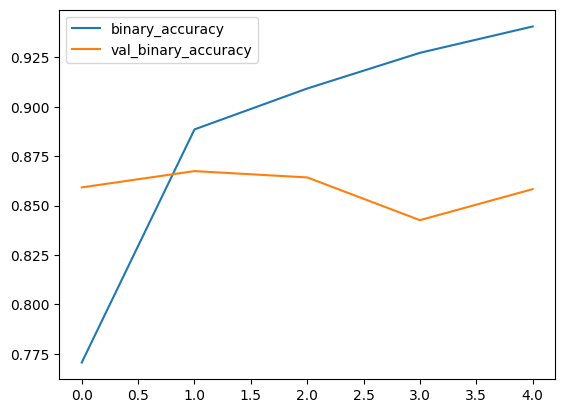

In [25]:
df_curve_acc.plot()

# Testing the model with test data

In [26]:
model.evaluate(x_data_test, y_data_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - binary_accuracy: 0.8707 - loss: 0.3456


[0.3468227684497833, 0.8685600161552429]

# Prediction with test data

In [ ]:
import numpy as np

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def review_decoder(encoded_reviews) :
    decoded_reviews = encoded_reviews.copy()
    for i in range (len(encoded_reviews)) :
        decoded_reviews[i] = " ".join([reverse_word_index.get(j - 3, '') for j in decoded_reviews[i]])
    return decoded_reviews

In [ ]:
x_test_decoded = review_decoder(x_test)

In [ ]:
x_test_decoded[0]

" please give this one a miss br br   and the rest of the cast  terrible performances the show is flat flat flat br br i don't know how michael  could have allowed this one on his  he almost seemed to know this wasn't going to work out and his performance was quite  so all you  fans give this a miss"

In [ ]:
model.predict(x_test_padded[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[0.10126379]], dtype=float32)

In [ ]:
y_test[0]

0